# IBM TLE Norcal project - Deep Learning Challenge
## Determining College retention based on social and educational variables

On the following notebook, I'll be exploring an example dataset related to a sample of college students that includes social and educational variables, as well as the retention level for each of them with almost 6200 observations; the basic idea of this exercise will be to construct a basic classification model based on several machine learning algorithms (Logistic regression, Random Forest and Forward Feed neural network or Multilayer perceptron) in order to asses if a students has a higer or lower risk of drop out of school, based on a series of features.

For this exercise I'll be using several cleaning and transformation techniques based on the Pyhton pandas library, visualizations based on Matplotlib and Seaborn libraries, and basic classification modeling, including grid search for hyper-parameter tunning and cross validation using the pyhton Scikit learn library (Logistic regression and Random Forest); for the MLP model I used the Keras library based on tensoflow to build a 4 layer MLP and the Scikit wrapper to perform a grid search in order to tune a list of basic hyper-parameters related to this model. 

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
csfont = {'fontname':'Arial'}
from sklearn import linear_model
from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical  
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
# The code was removed by Watson Studio for sharing.

,Student_ID,Gender,College,Citizenship,Marital Status,Applied Financial Aid,Received Financial Aid,Other Scholarships,Tuition Rate,Expected 4 Year Revenue,...,Student Health,Total Class Hours,Overall GPA,Change in GPA,Housing,Club Memberships,Infirmary Visits,City,State,Retention
0,ID_0001,Female,Liberal Arts & Sciences,Yes,Single,Yes,Yes,No,1975,237000,...,Good,26,3.615000,Negative,On Campus,2,0,"Huntsville, AL",Alabama,Retained
1,ID_0002,Male,Health Sciences,Yes,Single,Yes,No,No,1975,237000,...,Good,31,2.807742,Positive,On Campus,3,0,"Birmingham, AL",Alabama,Retained
2,ID_0003,Male,Engineering,Yes,Married,Yes,Yes,Yes,1975,237000,...,Good,27,3.473333,Negative,Off Campus,0,0,"Birmingham, AL",Alabama,Retained
3,ID_0004,Male,Business,Yes,Single,No,No,No,1975,237000,...,Good,31,3.466774,Positive,On Campus,0,0,"Birmingham, AL",Alabama,Retained
4,ID_0005,Male,Communications,Yes,Single,Yes,Yes,No,1975,237000,...,Good,31,3.089677,Positive,On Campus,2,0,"Birmingham, AL",Alabama,Retained


In [3]:
#Importing second dataset
body = client_b8c6e2907b17487a99b6a1834b9d7e35.get_object(Bucket='deeplearninge74b309f624442b390cd0dd2c8bc2942',Key='StudentRetentionProjectHS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,Student_ID,Type of High School,High School GPA,AP Tests Passed,High School Class Size,HS Class Rank
0,ID_0001,Private,2.833377,0,200-300,3rd Quartile
1,ID_0002,Public,3.269138,0,400-500,1st Quartile
2,ID_0003,Private,3.477564,1,400-500,1st Quartile
3,ID_0004,Public,3.778985,0,300-400,1st Quartile
4,ID_0005,Private,3.303029,0,400-500,1st Quartile


I'll be using two different data sets, one related to social and educational features for each student during their college period, and one that contains information related to their High school education; I proceeded to merge both datasets and to pre-process it (One-hot encode categorical values and scale the numercial ones) in order to create a series of arrays that can be used by Sci-kit learn in order to create a classification model

In [4]:
#Merging datasets on Student ID key
uniquedf = df_data_1.merge(df_data_2, on='Student_ID')

In [5]:
#Preview of the resulting Pandas dataframe
uniquedf.head()

,Student_ID,Gender,College,Citizenship,Marital Status,Applied Financial Aid,Received Financial Aid,Other Scholarships,Tuition Rate,Expected 4 Year Revenue,...,Club Memberships,Infirmary Visits,City,State,Retention,Type of High School,High School GPA,AP Tests Passed,High School Class Size,HS Class Rank
0,ID_0001,Female,Liberal Arts & Sciences,Yes,Single,Yes,Yes,No,1975,237000,...,2,0,"Huntsville, AL",Alabama,Retained,Private,2.833377,0,200-300,3rd Quartile
1,ID_0002,Male,Health Sciences,Yes,Single,Yes,No,No,1975,237000,...,3,0,"Birmingham, AL",Alabama,Retained,Public,3.269138,0,400-500,1st Quartile
2,ID_0003,Male,Engineering,Yes,Married,Yes,Yes,Yes,1975,237000,...,0,0,"Birmingham, AL",Alabama,Retained,Private,3.477564,1,400-500,1st Quartile
3,ID_0004,Male,Business,Yes,Single,No,No,No,1975,237000,...,0,0,"Birmingham, AL",Alabama,Retained,Public,3.778985,0,300-400,1st Quartile
4,ID_0005,Male,Communications,Yes,Single,Yes,Yes,No,1975,237000,...,2,0,"Birmingham, AL",Alabama,Retained,Private,3.303029,0,400-500,1st Quartile


In [6]:
#Preview of the resulting dataframe columns datatypes
uniquedf.dtypes

Student_ID                  object
Gender                      object
College                     object
Citizenship                 object
Marital Status              object
Applied Financial Aid       object
Received Financial Aid      object
Other Scholarships          object
Tuition Rate                 int64
Expected 4 Year Revenue      int64
Open Houses                  int64
Visits                       int64
Acceptance Type             object
Recruited Athlete           object
Student Health              object
Total Class Hours            int64
Overall GPA                float64
Change in GPA               object
Housing                     object
Club Memberships             int64
Infirmary Visits             int64
City                        object
State                       object
Retention                   object
Type of High School         object
High School GPA            float64
AP Tests Passed              int64
High School Class Size      object
HS Class Rank       

In [7]:
#creating a way to validate numeric columns dtypes
uniquedf['High School GPA'].dtypes in ('int64', 'float64')

True

In [8]:
#Creating a list of numeric dtype columns in dataframe 
a = []
for i in uniquedf.columns.tolist():
    if uniquedf[i].dtypes in ('int64', 'float64'):
        a.append(i)

In [9]:
#preview of the column list
a

['Tuition Rate',
 'Expected 4 Year Revenue',
 'Open Houses',
 'Visits',
 'Total Class Hours',
 'Overall GPA',
 'Club Memberships',
 'Infirmary Visits',
 'High School GPA',
 'AP Tests Passed']

In [10]:
#Add student list to the list
a.append('Student_ID')

In [11]:
#preview the list
a

['Tuition Rate',
 'Expected 4 Year Revenue',
 'Open Houses',
 'Visits',
 'Total Class Hours',
 'Overall GPA',
 'Club Memberships',
 'Infirmary Visits',
 'High School GPA',
 'AP Tests Passed',
 'Student_ID']

In [12]:
#subset the frame to obtain a numeric dtype version of the orginal frame
uniquenumeric = uniquedf[a]

In [13]:
#preview the frame
uniquenumeric.head()

,Tuition Rate,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Student_ID
0,1975,237000,0,0,26,3.615000,2,0,2.833377,0,ID_0001
1,1975,237000,0,0,31,2.807742,3,0,3.269138,0,ID_0002
2,1975,237000,0,0,27,3.473333,0,0,3.477564,1,ID_0003
3,1975,237000,0,0,31,3.466774,0,0,3.778985,0,ID_0004
4,1975,237000,0,0,31,3.089677,2,0,3.303029,0,ID_0005


In [14]:
#get summary of numeric columns
uniquenumeric.describe()

,Tuition Rate,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed
count,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000,6203.000000
mean,1921.443656,230573.238755,0.007577,0.038852,28.854425,3.099490,1.007255,0.978398,3.339042,0.126068
std,247.267882,29672.145853,0.090364,0.221992,2.081984,0.225220,1.022062,1.501644,0.281118,0.422179
min,780.000000,93600.000000,0.000000,0.000000,24.000000,2.304839,0.000000,0.000000,2.220858,0.000000
25%,1975.000000,237000.000000,0.000000,0.000000,27.000000,2.946036,0.000000,0.000000,3.163148,0.000000
50%,1975.000000,237000.000000,0.000000,0.000000,29.000000,3.100000,1.000000,0.000000,3.336333,0.000000
75%,1975.000000,237000.000000,0.000000,0.000000,30.000000,3.255000,2.000000,2.000000,3.519256,0.000000
max,1975.000000,237000.000000,2.000000,4.000000,35.000000,3.890000,3.000000,6.000000,4.200000,3.000000


In [15]:
#validate unique values of the Tuition rate column
uniquenumeric['Tuition Rate'].unique()

array([1975,  780])

In [16]:
#Remove the tuition rate column from the frame
a.remove('Tuition Rate')
a

['Expected 4 Year Revenue',
 'Open Houses',
 'Visits',
 'Total Class Hours',
 'Overall GPA',
 'Club Memberships',
 'Infirmary Visits',
 'High School GPA',
 'AP Tests Passed',
 'Student_ID']

In [17]:
#Subset once again the frame with the final list of columns, removing the student ID column and 
#previewing the frame
uniquenumeric = uniquedf[a]
a.remove('Student_ID')
uniquenumeric.head()

,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Student_ID
0,237000,0,0,26,3.615000,2,0,2.833377,0,ID_0001
1,237000,0,0,31,2.807742,3,0,3.269138,0,ID_0002
2,237000,0,0,27,3.473333,0,0,3.477564,1,ID_0003
3,237000,0,0,31,3.466774,0,0,3.778985,0,ID_0004
4,237000,0,0,31,3.089677,2,0,3.303029,0,ID_0005


In [18]:
#Scaling the numeric values of each column for pre-processing of the DF
scaler = MinMaxScaler()
uniquenumeric[a] = scaler.fit_transform(uniquenumeric[a])

/usr/local/src/bluemix_jupyter_bundle.v85/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/src/bluemix_jupyter_bundle.v85/notebook/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
#preview the final DF
uniquenumeric.head()

,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Student_ID
0,1,0,0,0.181818,0.826516,0.666667,0,0.309487,0.000000,ID_0001
1,1,0,0,0.636364,0.317257,1.000000,0,0.529664,0.000000,ID_0002
2,1,0,0,0.272727,0.737146,0.000000,0,0.634975,0.333333,ID_0003
3,1,0,0,0.636364,0.733008,0.000000,0,0.787274,0.000000,ID_0004
4,1,0,0,0.636364,0.495116,0.666667,0,0.546788,0.000000,ID_0005


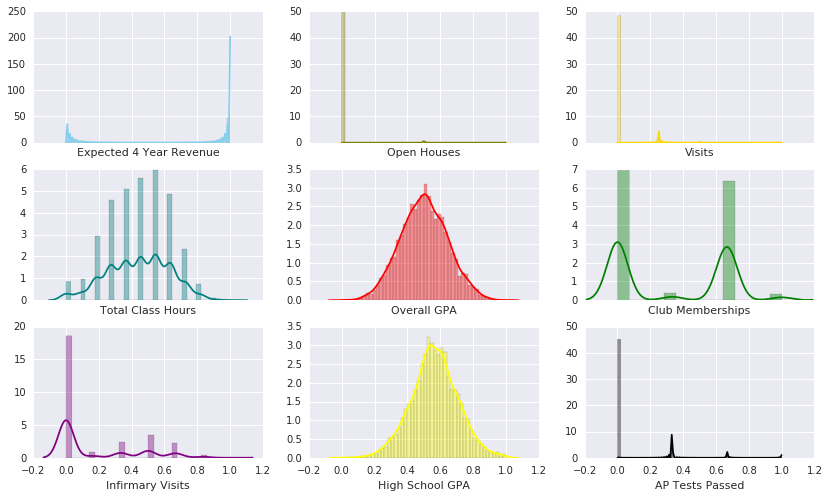

In [20]:
#plot histrograms for each column to check the resulting distributions
f, axes = plt.subplots(3, 3, figsize=(14, 8), sharex=True)
sns.distplot(uniquenumeric["Expected 4 Year Revenue"] , color="skyblue", ax=axes[0,0])
sns.distplot( uniquenumeric["Open Houses"] , color="olive", ax=axes[0,1])
sns.distplot( uniquenumeric["Visits"] , color="gold", ax=axes[0,2])
sns.distplot( uniquenumeric["Total Class Hours"] , color="teal", ax=axes[1,0])
sns.distplot( uniquenumeric["Overall GPA"] , color="red", ax=axes[1,1])
sns.distplot( uniquenumeric["Club Memberships"] , color="green", ax=axes[1,2])
sns.distplot( uniquenumeric["Infirmary Visits"] , color="purple", ax=axes[2,0])
sns.distplot( uniquenumeric["High School GPA"] , color="yellow", ax=axes[2,1])
sns.distplot( uniquenumeric["AP Tests Passed"] , color="black", ax=axes[2,2])

From the following visualization we can only a set of featuresin the data set tend to have a normal distribution after scaling them which confirms that MIN-MAX Scaling was a good choice for pre-procesing.

In [21]:
#Create a list of categorical values on the original DF
b = [x for x in uniquedf.columns.tolist() if x not in a]

In [22]:
#Subset the original DF to get only categorical columns
uniquecategorical = uniquedf[b]

In [23]:
#Remove Student ID and Retention from the list of categorical columns
b.remove('Student_ID')
b.remove('Retention')

In [24]:
#One-encode of the categorical values for pre-processing based on the edited list of
#columns
uniquecategorical = pd.get_dummies(uniquecategorical, columns=b)

In [25]:
#Preview the Dataframe
uniquecategorical.head()

,Student_ID,Retention,Gender_Female,Gender_Male,College_Business,College_Communications,College_Education,College_Engineering,College_Fine & Performing Arts,College_Health Sciences,...,High School Class Size_100-200,High School Class Size_200-300,High School Class Size_300-400,High School Class Size_400-500,High School Class Size_500+,High School Class Size_< 100,HS Class Rank_1st Quartile,HS Class Rank_2nd Quartile,HS Class Rank_3rd Quartile,HS Class Rank_4th Quartile
0,ID_0001,Retained,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,ID_0002,Retained,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,ID_0003,Retained,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,ID_0004,Retained,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,ID_0005,Retained,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [26]:
#Merging the numeric and categorical frames into a single one On the Student ID Key
uniquefinal = uniquenumeric.merge(uniquecategorical, on='Student_ID')

In [27]:
#Getting the shape of the resulting frame
uniquefinal.shape

(6203, 248)

In [28]:
#Preview the final frame 
uniquefinal.head()

,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Student_ID,...,High School Class Size_100-200,High School Class Size_200-300,High School Class Size_300-400,High School Class Size_400-500,High School Class Size_500+,High School Class Size_< 100,HS Class Rank_1st Quartile,HS Class Rank_2nd Quartile,HS Class Rank_3rd Quartile,HS Class Rank_4th Quartile
0,1,0,0,0.181818,0.826516,0.666667,0,0.309487,0.000000,ID_0001,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0.636364,0.317257,1.000000,0,0.529664,0.000000,ID_0002,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0.272727,0.737146,0.000000,0,0.634975,0.333333,ID_0003,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0.636364,0.733008,0.000000,0,0.787274,0.000000,ID_0004,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0.636364,0.495116,0.666667,0,0.546788,0.000000,ID_0005,...,0,0,0,1,0,0,1,0,0,0


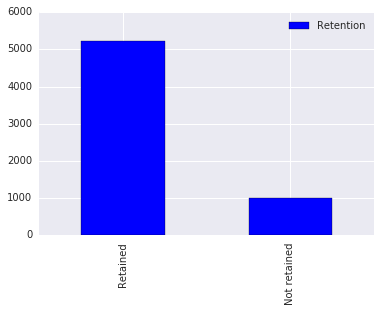

In [29]:
#get a visualization for the counts of each target value for reference
#we can identify that we have a rather unbalanced dataset and we will need to
#adress this problem on a next step; for now we will work with the data set as-is
pd.DataFrame(uniquefinal.Retention.value_counts()).plot.bar()

One of the problems I detected in the data set is a high unbalance in the target classes (retained/Not retained) that could seriously impact the accuracy of the classification models, specially the least robust ones; Initially I'll ignore this unbalance, and use a simple linear calssifier to see if this problem affects the acurracy and overall metrics, and if an impact is detected I'll apply some modifications on the dataset in order to deal with this problem.

In [30]:
#Create a separate frame with the target values only
target = uniquefinal[['Retention']]

In [31]:
#Create a separate frame with the Features and Student ID values only
features = uniquefinal.drop(['Student_ID', 'Retention'], axis=1)

In [32]:
#Preview the target DF
target.head()

,Retention
0,Retained
1,Retained
2,Retained
3,Retained
4,Retained


In [33]:
#getting the unique values from the target column
target.Retention.unique()

array(['Retained', 'Not retained'], dtype=object)

In [34]:
#Create a version of the target DF with numerical instead of categorical values
target_scikit = target.replace({'Retained':1, 'Not retained':0})

In [35]:
#Preview the resulting frame
target_scikit.head()

,Retention
0,1
1,1
2,1
3,1
4,1


In [36]:
#Getting value counts for each target class
target_scikit.Retention.value_counts()

1    5212
0     991
Name: Retention, dtype: int64

In [37]:
#preview the features Dataset
features.head()

,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Gender_Female,...,High School Class Size_100-200,High School Class Size_200-300,High School Class Size_300-400,High School Class Size_400-500,High School Class Size_500+,High School Class Size_< 100,HS Class Rank_1st Quartile,HS Class Rank_2nd Quartile,HS Class Rank_3rd Quartile,HS Class Rank_4th Quartile
0,1,0,0,0.181818,0.826516,0.666667,0,0.309487,0.000000,1,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0.636364,0.317257,1.000000,0,0.529664,0.000000,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0.272727,0.737146,0.000000,0,0.634975,0.333333,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0.636364,0.733008,0.000000,0,0.787274,0.000000,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0.636364,0.495116,0.666667,0,0.546788,0.000000,0,...,0,0,0,1,0,0,1,0,0,0


In [38]:
#getting te shape for both the feature and the target DF
#it seems that we have 6203 observations and 246 features after 
#one-hot econding
print (target_scikit.shape, features.shape)

((6203, 1), (6203, 246))


In [39]:
#Splitting the datasets into training and test datasets for innitial model cosntruction
X_train, X_Test, y_train, y_test = train_test_split(features, target_scikit, random_state=2018, test_size=0.20)

In [40]:
#Getting the shape of both the training and test data sets
print 'train data set shape:' + str(X_train.shape) + str(y_train.shape)
print 'test data set shape:'+ str(X_Test.shape) + str(y_test.shape)

train data set shape:(4962, 246)(4962, 1)
test data set shape:(1241, 246)(1241, 1)


In [41]:
#defining a dictionary with the set of hyperparameters we will evaluate on the first model
#we want to evaluate
parameters = {'penalty': ('l1', 'l2'), 'C':[1.0, 1.5, 3, 10]}

In [42]:
#Creating the model, performing a grid search with CV and 5 K-folds
#to estimate the best hyperparameters for Logistic regression as
#the selected ML algorithm to be used as an innitial approximation
logreg = linear_model.LogisticRegression()
clf = model_selection.GridSearchCV(logreg, parameters, cv=5)
clf.fit(X_train, y_train)

/gpfs/fs01/user/sb6c-dce607d1c246e7-92b571804c85/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [1.0, 1.5, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
#Obtaining the best Hyperparameters defined by the Gridsearch
print(clf.best_params_)

{'penalty': 'l2', 'C': 1.0}


In [44]:
#Using the best hyperparameters to fit them in a Logistic regression
#Model using the traing and test data sets
blogreg = linear_model.LogisticRegression(**clf.best_params_)
blogreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
#Get the overall score for the model
blogreg.score(X_Test, y_test)

0.85898468976631748

We innitially explore a basic linear model such as Logistic Regression in order to asses the basic level of explanatory capacity the features we have defined from the data set (246 features after One-hot encoding and scaling) have over the target value we wish to determine; I created a small dictionaries of hyper-parameter options (Type of penalization and strenght of the regularization we are using to avoid overfitting in the model) and pass it to a grid search with a 5-fold cross validation scheme; we obtained a model with a fairly good overall score of 85.89% of accuraccy.

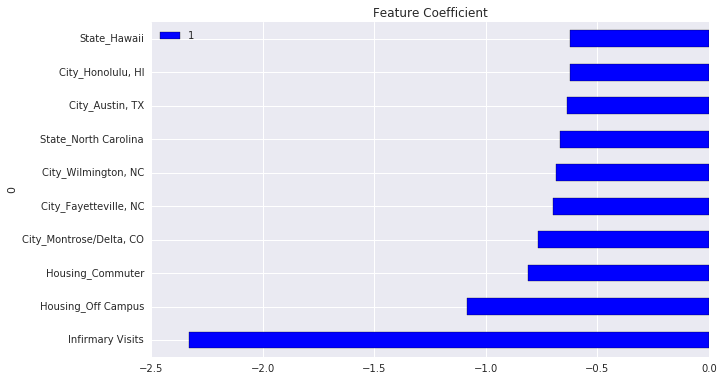

In [46]:
#Obtain the top 10 features with negative impact on retention
lrnegativeft = pd.DataFrame(zip(X_train.columns, np.transpose(blogreg.coef_))).sort_values(by=1).head(10)
lrnegativeft.set_index(0,drop=True,inplace=True)
lrnegativeft[1] = lrnegativeft[1].apply(float)
lrnegativeft.plot(kind='barh', figsize = (10,6), title = 'Feature Coefficient', label=False)

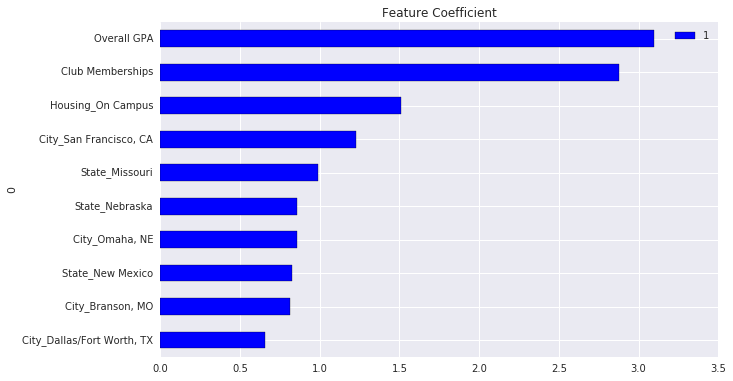

In [47]:
#Obtaining the top 10 features with positive impact on retention
lrpositiveft = pd.DataFrame(zip(X_train.columns, np.transpose(blogreg.coef_))).sort_values(by=1).tail(10)
lrpositiveft.set_index(0,drop=True,inplace=True)
lrpositiveft[1] = lrpositiveft[1].apply(float)
lrpositiveft.plot(kind='barh', figsize = (10,6), title = 'Feature Coefficient', label=False)

We can see from the graphics that there are several features that seem to impact negatively (Overall GPA level, number of club memberhips, and living on campus) and positively (Number of visits to the infirmary, living off campus and having to comute) the probability of a student droping out of school. 

In [48]:
#Creating an array for model predictions based on the Test data set
predicted = blogreg.predict(X_Test)

In [49]:
#printing the confussion Matrix and Classification report for the model
#here we can see that due to the unbalance in the original data set, the model shows
#some clear limitations on the accuracy and precision on the class that is under-represented
#Given this problem, we'll try a solution using a under-sampling approach
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[ 86 118]
 [ 57 980]]
             precision    recall  f1-score   support

          0       0.60      0.42      0.50       204
          1       0.89      0.95      0.92      1037

avg / total       0.84      0.86      0.85      1241



However from the previous confussion matrix we can see that even though the model has a fairly high level of overall accuracy, due to the inbalance on the observations for each target class, it has problems to correctly classify students that are likely to drop out of school; in order to deal with this problem we will perform a under-sampling approach in order to correct the proportion for each target class in the dataset we'll use to train the model to see if this change can actually improve the level acurracy towards the under represented class. 

In [50]:
#creating an undersampled dataset, dropping some of the observations that are linked to 
#the highly represented class in order to obtain a more balanced data-set
#for this case we will ramdomly drop 50% of the highly represented class in the
#data-set
uniquebalanced = uniquefinal.drop((uniquefinal[uniquefinal.Retention != 'Not retained']).sample(frac=0.5).index)

In [51]:
#Create an unique value count for the new balanced data set
uniquebalanced.Retention.value_counts()

Retained        2606
Not retained     991
Name: Retention, dtype: int64

In [52]:
#Creating a separate datasets for the targets in the balanced data set
balancedtarget = uniquebalanced[['Retention']]

In [53]:
#Creating a separate datasets for the features in the balanced data set
balancedfeatures = uniquebalanced.drop(['Student_ID', 'Retention'], axis=1)

In [54]:
#Mapping a 1 hot enconding for the target DF
target_scikit_balanced = balancedtarget.replace({'Retained':1, 'Not retained':0})

In [55]:
#Print the shapes for both DF
print (target_scikit_balanced.shape, balancedfeatures.shape)

((3597, 1), (3597, 246))


In [56]:
#Splitting the new Data sets into training and test data sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(balancedfeatures, target_scikit_balanced, \
                                                        random_state=2018, test_size=0.20)

In [57]:
#Creating the model, performing a grid search with CV and 5 K-folds
#to estimate the best hyperparameters for Logistic regression as
#the selected ML algorithm with the new balanced data set
logreg1 = linear_model.LogisticRegression()
clf1 = model_selection.GridSearchCV(logreg1, parameters, cv=5)
clf1.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [1.0, 1.5, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
#Getting the best parameters for the grid search
print(clf1.best_params_)

{'penalty': 'l1', 'C': 1.0}


In [59]:
#Fitting the best parameters in a Logisitic regression
blogreg1 = linear_model.LogisticRegression(**clf1.best_params_)
blogreg1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
#Obtaining the overall score of this new model
blogreg1.score(X_test1, y_test1)

0.80555555555555558

In [61]:
#Creating an array for the predicted classes from the test data set using the model
predicted1 = blogreg1.predict(X_test1)

In [62]:
#printing the confussion Matrix and Classification report for the model
#here we can see that the predictions for this balanced data set has improved
#from the original one
print metrics.confusion_matrix(y_test1, predicted1)
print metrics.classification_report(y_test1, predicted1)

[[113  95]
 [ 45 467]]
             precision    recall  f1-score   support

          0       0.72      0.54      0.62       208
          1       0.83      0.91      0.87       512

avg / total       0.80      0.81      0.80       720



Once we perform an under-sampling approach in order to correct the proportion for each target class in the dataset, I Trained a new model (using the logistic regression algorithm); after training the model, altouhgt we see a drop in the overall accuraccy, we do se an improvement in terms of the ability to correctly detect the negative class (drop-our students) when compared with the innitial model. 

In [63]:
#Now we train a more robust algorithm (Random Forest)
#For that, we pass a dictionary of hyperparameters to do a Gridsearch with CV
parameters1 = {'n_estimators': [200, 300, 500, 800], 'criterion': ('gini', 'entropy'), 'class_weight':[{0: 5, 1: 1}, \
                                                {0: 10, 1: 1}, {0: 50, 1: 1}]}

In [64]:
#Creating the model, performing a grid search with CV and 3 K-folds
#to estimate the best hyperparameters for Random Forests as
#the selected ML algorithm with the new balanced data set
ranfor = ensemble.RandomForestClassifier()
rdf = model_selection.GridSearchCV(ranfor, parameters1, cv=3)
rdf.fit(X_train, y_train)

/gpfs/fs01/user/sb6c-dce607d1c246e7-92b571804c85/.local/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/gpfs/fs01/user/sb6c-dce607d1c246e7-92b571804c85/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300, 500, 800], 'criterion': ('gini', 'entropy'), 'class_weight': [{0: 5, 1: 1}, {0: 10, 1: 1}, {0: 50, 1: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
#Getting the best parameters for the models
rdf.best_params_

{'class_weight': {0: 50, 1: 1}, 'criterion': 'entropy', 'n_estimators': 800}

In [66]:
#passing the best hyperparameters into the model 
ranfor1 = ensemble.RandomForestClassifier(**rdf.best_params_)

In [67]:
#Fitting the model with the training data set
ranfor1.fit(X_train1, y_train1)

/usr/local/src/bluemix_jupyter_bundle.v85/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight={0: 50, 1: 1},
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [68]:
#Getting the general score for this model
ranfor1.score(X_test1, y_test1)

0.86388888888888893

In [69]:
#Getting the array of predicted Values
predicted2 = ranfor1.predict(X_test1)

In [70]:
#printing the confussion Matrix and Classification report for the model
#here we can see that the predictions for this balanced data set has improved
#from the original one as well as the overall precision for all classes
print metrics.confusion_matrix(y_test1, predicted2)
print metrics.classification_report(y_test1, predicted2)

[[131  77]
 [ 21 491]]
             precision    recall  f1-score   support

          0       0.86      0.63      0.73       208
          1       0.86      0.96      0.91       512

avg / total       0.86      0.86      0.86       720



I deciced to try a second algorithm to build a new model (Random Forest) that was more robust and could identify stroger relationships between the features and the nibary classes we seek to classify; using the balanced dataset we can see a great improvement in the overall accuracy of the model (86%) as well as the ability of the model to detect the negative classes when compared with a linear model such a logistic regression.

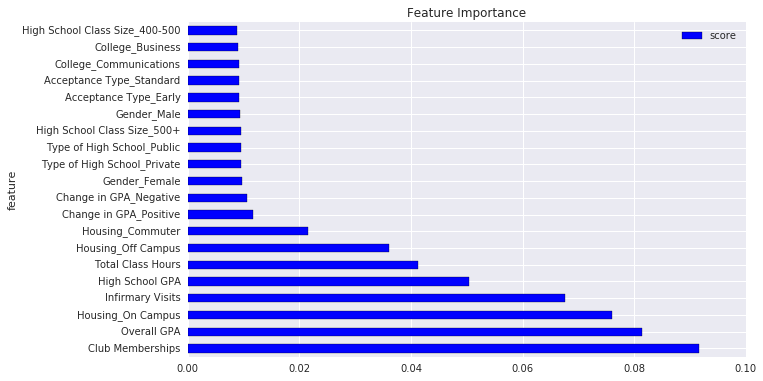

In [71]:
#Obtaining the top 20 features with the most importance in the model
#Here the importance does not mean a positive of negative relationship with retention
rffeatures = pd.DataFrame(sorted(zip(X_train.columns, ranfor1.feature_importances_), key=lambda x: x[1] * -1), \
             columns=['feature', 'score']).head(20)
rffeatures.set_index('feature',drop=True,inplace=True)
rffeatures.plot(kind='barh', figsize = (10,6), title = 'Feature Importance', label=True)

In [72]:
#Initiating a random seed for Keras implementation of a NN
seed = 2018
np.random.seed(seed)

In [73]:
a.append('Student_ID')
suniquenumeric = uniquedf[a]
suniquenumeric.head()
sscaler = StandardScaler()
a.remove('Student_ID')
suniquenumeric[a] = sscaler.fit_transform(suniquenumeric[a])

/usr/local/src/bluemix_jupyter_bundle.v85/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [74]:
suniquenumeric.head()

,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Student_ID
0,0.21661,-0.083856,-0.17503,-1.371123,2.289103,0.971395,-0.651603,-1.798910,-0.298637,ID_0001
1,0.21661,-0.083856,-0.17503,1.030626,-1.295500,1.949888,-0.651603,-0.248687,-0.298637,ID_0002
2,0.21661,-0.083856,-0.17503,-0.890773,1.660037,-0.985592,-0.651603,0.492793,2.070217,ID_0003
3,0.21661,-0.083856,-0.17503,1.030626,1.630911,-0.985592,-0.651603,1.565103,-0.298637,ID_0004
4,0.21661,-0.083856,-0.17503,1.030626,-0.043575,0.971395,-0.651603,-0.128118,-0.298637,ID_0005


In [75]:
#Merging the numeric and categorical frames into a single one On the Student ID Key
suniquefinal = suniquenumeric.merge(uniquecategorical, on='Student_ID')

In [76]:
suniquefinal.head()

,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Student_ID,...,High School Class Size_100-200,High School Class Size_200-300,High School Class Size_300-400,High School Class Size_400-500,High School Class Size_500+,High School Class Size_< 100,HS Class Rank_1st Quartile,HS Class Rank_2nd Quartile,HS Class Rank_3rd Quartile,HS Class Rank_4th Quartile
0,0.21661,-0.083856,-0.17503,-1.371123,2.289103,0.971395,-0.651603,-1.798910,-0.298637,ID_0001,...,0,1,0,0,0,0,0,0,1,0
1,0.21661,-0.083856,-0.17503,1.030626,-1.295500,1.949888,-0.651603,-0.248687,-0.298637,ID_0002,...,0,0,0,1,0,0,1,0,0,0
2,0.21661,-0.083856,-0.17503,-0.890773,1.660037,-0.985592,-0.651603,0.492793,2.070217,ID_0003,...,0,0,0,1,0,0,1,0,0,0
3,0.21661,-0.083856,-0.17503,1.030626,1.630911,-0.985592,-0.651603,1.565103,-0.298637,ID_0004,...,0,0,1,0,0,0,1,0,0,0
4,0.21661,-0.083856,-0.17503,1.030626,-0.043575,0.971395,-0.651603,-0.128118,-0.298637,ID_0005,...,0,0,0,1,0,0,1,0,0,0


In [77]:
#creating an undersampled dataset, dropping some of the observations that are linked to 
#the highly represented class in order to obtain a more balanced data-set
#for this case we will ramdomly drop 50% of the highly represented class in the
#data-set
suniquebalanced = suniquefinal.drop((uniquefinal[uniquefinal.Retention != 'Not retained']).sample(frac=0.5).index)

In [78]:
#Create an unique value count for the new balanced data set
suniquebalanced.Retention.value_counts()

Retained        2606
Not retained     991
Name: Retention, dtype: int64

In [79]:
#Creating a separate datasets for the targets in the balanced data set
sbalancedtarget = suniquebalanced[['Retention']]
sbalancedfeatures = suniquebalanced.drop(['Student_ID', 'Retention'], axis=1)

In [80]:
#Creating a numpy array from the target values
targetoh = pd.get_dummies(sbalancedtarget).values

In [81]:
targetoh

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [82]:
#previewing the new feature frame
sbalancedfeatures.head()

,Expected 4 Year Revenue,Open Houses,Visits,Total Class Hours,Overall GPA,Club Memberships,Infirmary Visits,High School GPA,AP Tests Passed,Gender_Female,...,High School Class Size_100-200,High School Class Size_200-300,High School Class Size_300-400,High School Class Size_400-500,High School Class Size_500+,High School Class Size_< 100,HS Class Rank_1st Quartile,HS Class Rank_2nd Quartile,HS Class Rank_3rd Quartile,HS Class Rank_4th Quartile
0,0.21661,-0.083856,-0.17503,-1.371123,2.289103,0.971395,-0.651603,-1.798910,-0.298637,1,...,0,1,0,0,0,0,0,0,1,0
2,0.21661,-0.083856,-0.17503,-0.890773,1.660037,-0.985592,-0.651603,0.492793,2.070217,0,...,0,0,0,1,0,0,1,0,0,0
5,0.21661,-0.083856,-0.17503,0.550277,0.912558,0.971395,-0.651603,-0.451912,-0.298637,1,...,0,0,0,0,1,0,1,0,0,0
8,0.21661,-0.083856,-0.17503,-0.410423,-0.118265,0.971395,-0.651603,0.877784,-0.298637,0,...,0,0,0,1,0,0,1,0,0,0
10,0.21661,-0.083856,-0.17503,0.550277,-0.108749,0.971395,-0.651603,0.439920,2.070217,1,...,0,1,0,0,0,0,1,0,0,0


In [83]:
#Creating a numpy array from the feature dataframe 
featuresoh = sbalancedfeatures.values

In [84]:
#Sppliting the feature and target arrays into a traingn and test data sets
X_train1np, X_test1np, y_train1np, y_test1np = train_test_split(featuresoh, targetoh, \
                                                                test_size=0.20, random_state=2018) 

In [85]:
#Get the new array shapes (sizes)
print (X_train1np.shape, y_train1np.shape)
print (X_test1np.shape, y_test1np.shape)

((2877, 246), (2877, 2))
((720, 246), (720, 2))


Finally I decided to build a final model using a Forward feed neural netwrok (or Multilayer perceptron) with 4 hidden layers using the keras library in order to determine if a more robust classifing algorithm could imprve the overall acurracy when compared with the random forest algorithm, as well as to classify more accurately the negative class in this problem; for this task I build a new version of the pre-processed balanced dataset using a Standar scaling algorithm, in order to obtain a distribution for the numeric data with a mean of 0 and a SD of 1 (which is preferred for NN implementtions over Min-Max Scaling).

In [86]:
#Defining a function in order to create a a MLP with 4 layers
#each layer will a smaller number 
def create_model(dropout_rate):
    # default values
    activation='relu' # or linear
    dropout_rate=0.5 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(220, input_shape=(246,), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(110, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(30, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [87]:
model = KerasClassifier(build_fn=create_model, batch_size=100, epochs=20)

In [88]:
epochs = [40, 70, 100] 
batch_size = [10, 30, 40] 
dropout_rate = [0.2, 0.5, 0.8]
param_grid = dict(epochs=epochs, batch_size=batch_size, dropout_rate=dropout_rate)

In [89]:
grid = model_selection.GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4)

In [90]:
grid_result = grid.fit(X_train1np, y_train1np, verbose=0) 

1680/1918 [=========================>....] - ETA: 0s

In [91]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.831422 using {'epochs': 100, 'dropout_rate': 0.8, 'batch_size': 30}


In [92]:
keras.backend.clear_session()
np.random.seed(seed)

In [93]:
model1 = create_model(dropout_rate=0.8)

In [94]:
model1.fit(X_train1np, y_train1np, epochs=100, batch_size=30,  verbose=1, validation_split=0.2)

Train on 2301 samples, validate on 576 samples
Epoch 1/100
2301/2301 [==============================] - 1s - loss: 0.6606 - acc: 0.6193 - val_loss: 0.5872 - val_acc: 0.7049
Epoch 2/100
2301/2301 [==============================] - 0s - loss: 0.5633 - acc: 0.7086 - val_loss: 0.5062 - val_acc: 0.7049
Epoch 3/100
2301/2301 [==============================] - 0s - loss: 0.4945 - acc: 0.7421 - val_loss: 0.4249 - val_acc: 0.8003
Epoch 4/100
2301/2301 [==============================] - 0s - loss: 0.4464 - acc: 0.7703 - val_loss: 0.4032 - val_acc: 0.8064
Epoch 5/100
2301/2301 [==============================] - 0s - loss: 0.4305 - acc: 0.7947 - val_loss: 0.3952 - val_acc: 0.8012
Epoch 6/100
2301/2301 [==============================] - 0s - loss: 0.4001 - acc: 0.8096 - val_loss: 0.3985 - val_acc: 0.8090
Epoch 7/100
2301/2301 [==============================] - 0s - loss: 0.3928 - acc: 0.8299 - val_loss: 0.3835 - val_acc: 0.8177
Epoch 8/100
2301/2301 [==============================] - 0s - loss: 0.3

In [95]:
loss, accuracy = model1.evaluate(X_test1np, y_test1np)
percent = accuracy * 100
print("Test Accuracy: %f%%" %  percent)

 32/720 [>.............................] - ETA: 0sTest Accuracy: 84.305556%


In [96]:
ypredictnp = model1.predict_classes(X_test1np, verbose=1) 

 32/720 [>.............................] - ETA: 0s

In [97]:
print metrics.confusion_matrix(np.argmax(y_test1np, axis=1), ypredictnp)
print metrics.classification_report(np.argmax(y_test1np, axis=1), ypredictnp)

[[110  68]
 [ 45 497]]
             precision    recall  f1-score   support

          0       0.71      0.62      0.66       178
          1       0.88      0.92      0.90       542

avg / total       0.84      0.84      0.84       720



In [98]:
keras.backend.clear_session()
np.random.seed(seed)